# Time Series Forcasting


In [30]:
# import Libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [3]:
# Data Loading 

df = pd.read_csv('.csv')
df_test = pd.read_csv('Data/DailyDelhiClimateTest.csv')

In [4]:
df.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


In [16]:
df_test.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333


In [5]:
df=df[['date','meantemp']]

In [6]:
df=df.rename(columns={'date':'ds','meantemp':'y'})

In [8]:
pd.to_datetime(df.ds)

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: ds, Length: 1462, dtype: datetime64[ns]

In [9]:
# Delete the last row (2017-01-01)
df = df[:-1]

15:10:04 - cmdstanpy - INFO - Chain [1] start processing
15:10:04 - cmdstanpy - INFO - Chain [1] done processing
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior 

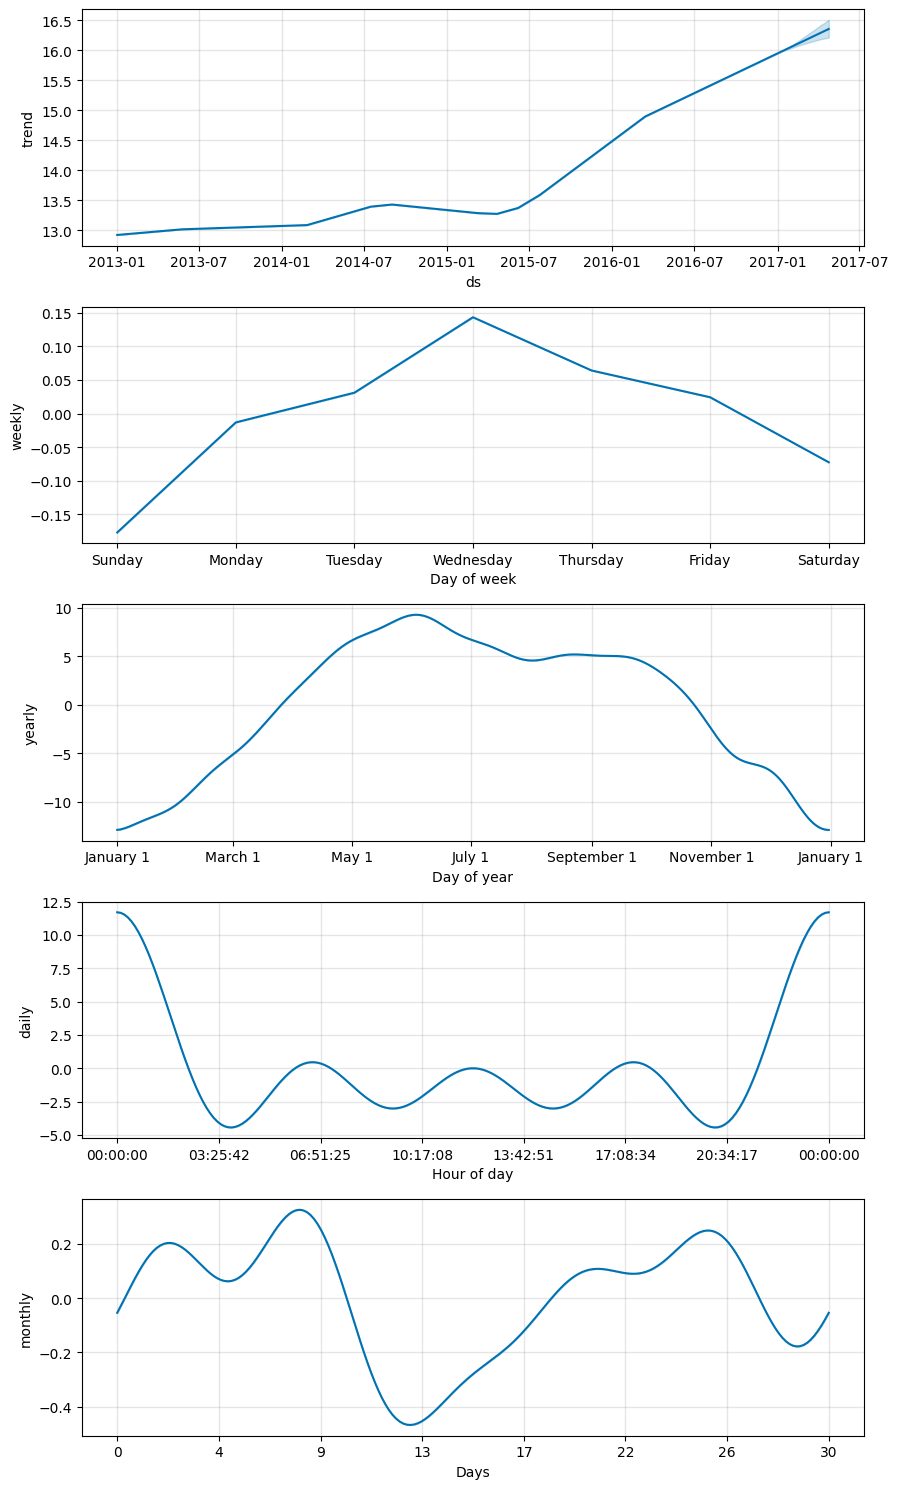

In [12]:
# Initialize model
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True)

# Add monthly seasonality to the model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)

# Fit the model with training data and make prediction
m.fit(df)
future = m.make_future_dataframe(periods=114)
forecast = m.predict(future)
fig = m.plot_components(forecast)

d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
d:\Machine Learning Projects\PSCACrimAnalysis\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


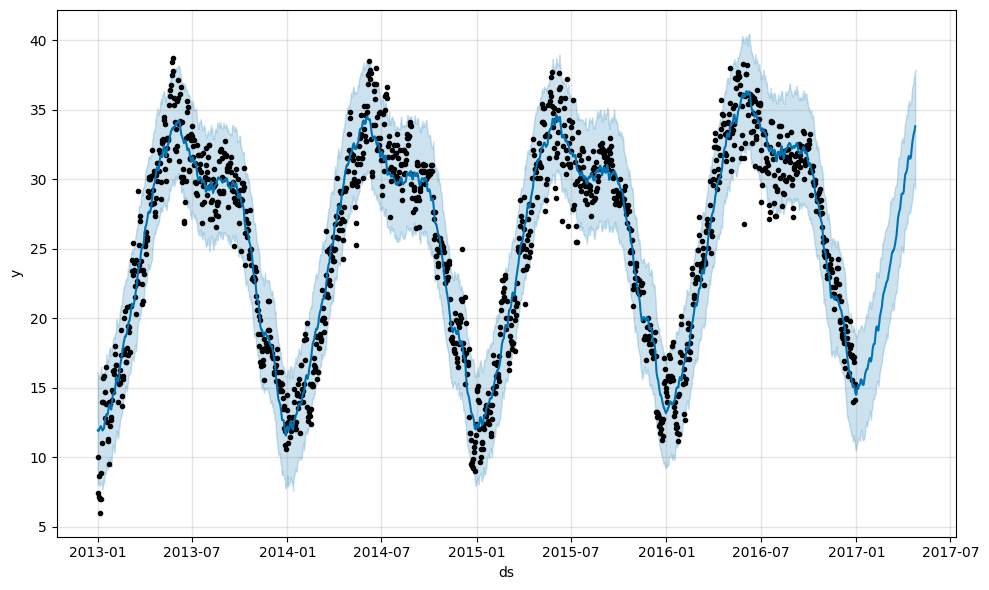

In [13]:
figure = m.plot(forecast)

In [14]:
plot_plotly(m, forecast)

In [17]:
plot_components_plotly(m,forecast)

In [15]:
from sklearn.metrics import r2_score
y_true = df_test.meantemp
y_pred = forecast.yhat.tail(114)
r2_score(y_true, y_pred)

0.8146032255555289

In [23]:
df = pd.read_csv(r"PoliceStations\PS Nishter Colony\MOTORCYCLE THEFT.csv",parse_dates=['report_date'])

In [24]:
df.shape

(3395, 14)

In [25]:
# Data from 1-01-2022 till 8-03-2024
df = df[df['report_date'] >= '2023-07-01']

In [26]:
grouped_df = df.groupby(['report_date']).size().reset_index(name='CrimeCount')

In [27]:
grouped_df

,report_date,CrimeCount
0,2023-08-09,2
1,2023-08-10,2
2,2023-08-11,1
3,2023-08-15,2
4,2023-08-16,3
...,...,...
177,2024-03-02,3
178,2024-03-03,1
179,2024-03-04,2
180,2024-03-05,1


## Train Test Split

### Prophet just needs two columns with specific names: ‘ds’ and ‘y’

In [28]:
grouped_df=grouped_df.rename(columns={'report_date':'ds','CrimeCount':'y'})

train_df = grouped_df.iloc[:144]
test_df = grouped_df.iloc[144:]
train_df.shape,test_df.shape 

((144, 2), (38, 2))

In [33]:
df.columns

Index(['report_date', 'report_time', 'location', 'category', 'sub_category',
       'x_cord', 'y_cord', 'ps_division', 'ps_station', 'year', 'month',
       'shift', 'case_id', 'contact_no'],
      dtype='object')

In [32]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [29]:
model = Prophet()
model.fit(train_df)

22:10:07 - cmdstanpy - INFO - Chain [1] start processing
22:10:07 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
# Predict on training set with model
test_data_fcst = model.predict(df=test_df)

In [36]:
test_data_fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-01-20,1.780790,-1.009855,3.720993,1.780790,1.780790,-0.441380,-0.441380,-0.441380,-0.441380,-0.441380,-0.441380,0.0,0.0,0.0,1.339410
1,2024-01-21,1.766406,-0.495232,4.160673,1.766406,1.766406,0.091322,0.091322,0.091322,0.091322,0.091322,0.091322,0.0,0.0,0.0,1.857728
2,2024-01-22,1.752022,-0.834649,3.834734,1.752022,1.752023,-0.170360,-0.170360,-0.170360,-0.170360,-0.170360,-0.170360,0.0,0.0,0.0,1.581663
3,2024-01-23,1.737638,-0.358683,4.260762,1.737637,1.737639,0.160538,0.160538,0.160538,0.160538,0.160538,0.160538,0.0,0.0,0.0,1.898176
4,2024-01-24,1.723255,0.013158,4.512808,1.723253,1.723256,0.490963,0.490963,0.490963,0.490963,0.490963,0.490963,0.0,0.0,0.0,2.214218
5,2024-01-25,1.708871,-1.058076,3.523665,1.708868,1.708873,-0.350213,-0.350213,-0.350213,-0.350213,-0.350213,-0.350213,0.0,0.0,0.0,1.358657
6,2024-01-28,1.665719,-0.451694,4.181283,1.665716,1.665722,0.091322,0.091322,0.091322,0.091322,0.091322,0.091322,0.0,0.0,0.0,1.757041
7,2024-01-30,1.636951,-0.456967,4.177897,1.636947,1.636955,0.160538,0.160538,0.160538,0.160538,0.160538,0.160538,0.0,0.0,0.0,1.797489
8,2024-02-01,1.608183,-0.939185,3.559348,1.608179,1.608188,-0.350213,-0.350213,-0.350213,-0.350213,-0.350213,-0.350213,0.0,0.0,0.0,1.257970
9,2024-02-02,1.593800,-0.422035,4.102881,1.593794,1.593805,0.219130,0.219130,0.219130,0.219130,0.219130,0.219130,0.0,0.0,0.0,1.812929


21:56:25 - cmdstanpy - INFO - Chain [1] start processing
21:56:25 - cmdstanpy - INFO - Chain [1] done processing
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\pl

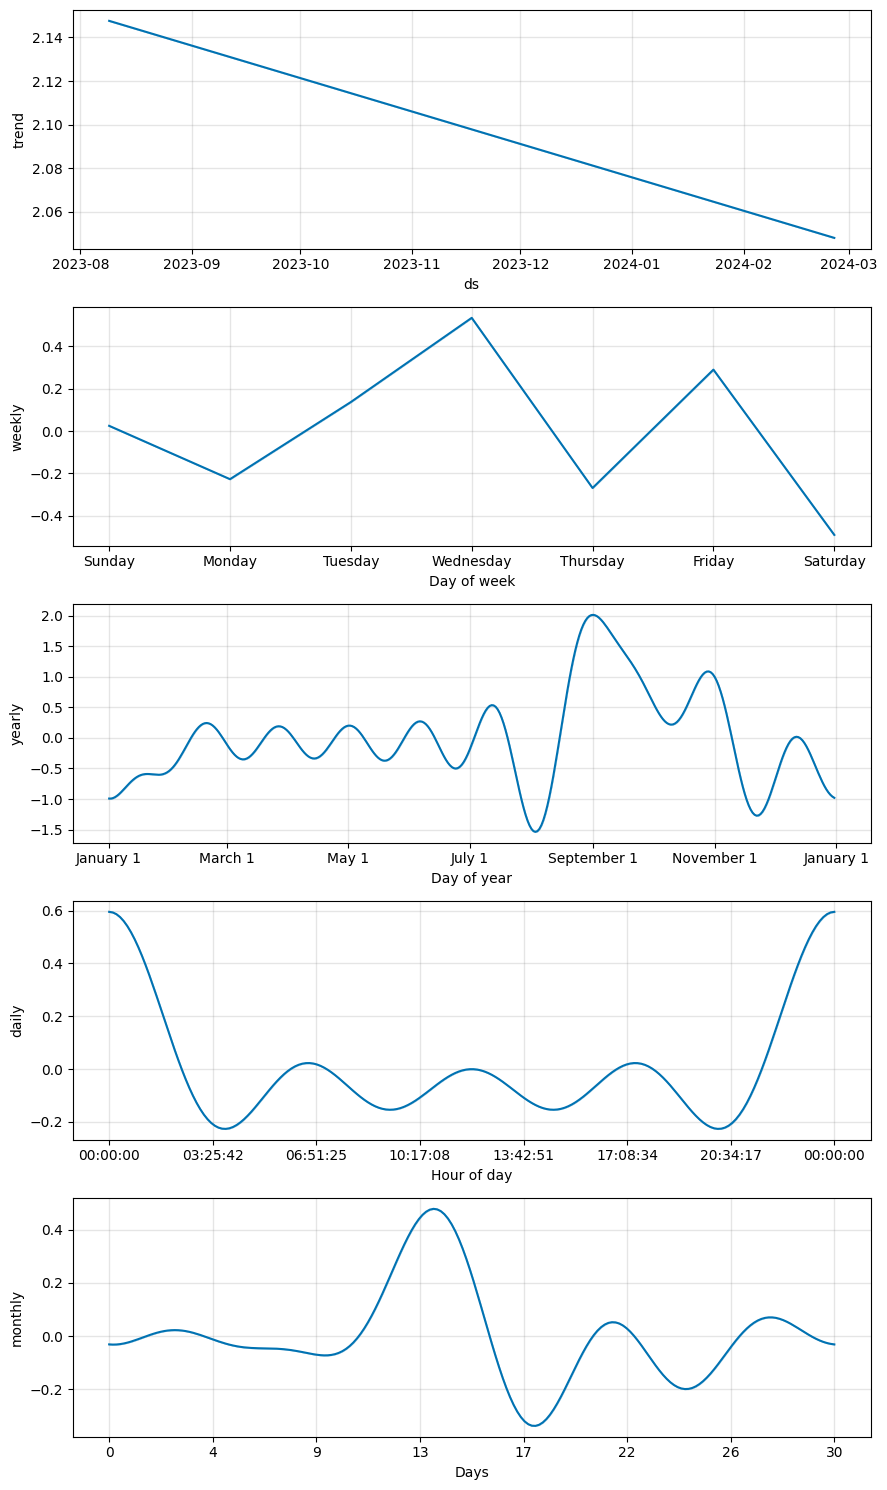

In [16]:
# Initialize model
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True)
# Add monthly seasonality to the model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
# Fit the model with training data and make prediction
m.fit(train_df)
future = m.make_future_dataframe(periods=38)
forecast = m.predict(future)
fig = m.plot_components(forecast)

e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
e:\Data Science\Machine Learning projects\Lahore15Analysis\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


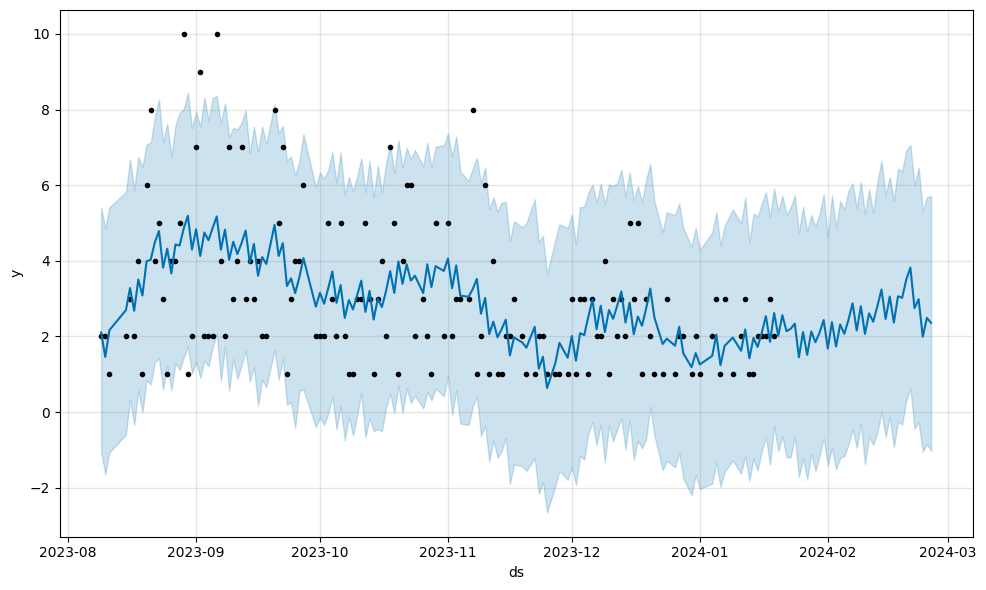

In [17]:
figure = m.plot(forecast)

In [11]:
plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m,forecast)